In [70]:
from pathlib import Path
import pandas as pd
import torch
import numpy as np

# for ploting
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from typing import Literal, Dict, List
import shutil



data_dir=Path.cwd().parent/'data'

raw_dir=data_dir/'raw'

extracted_raw_dir=data_dir/'extracted'






# spanish dataset

In [2]:
spanish_df=pd.read_excel(extracted_raw_dir / "spanish" / "FETAL_PLANES_DB_data.xlsx")
spanish_df['Plane']=spanish_df['Plane'].apply(lambda x:x.replace(' ', '_'))
spanish_df = spanish_df[['Image_name', 'Patient_num', 'Plane']]

spanish_planes_count=spanish_df['Plane'].value_counts(normalize=True).reset_index()
spanish_planes_count

,Plane,proportion
0,Other,0.339758
1,Fetal_brain,0.249355
2,Fetal_thorax,0.138548
3,Maternal_cervix,0.131129
4,Fetal_femur,0.083871
5,Fetal_abdomen,0.057339


In plane 'Other' has 33% of total images in spanish dataset. So, we have to drop  it.

total number of planes having others: 4213


<Axes: xlabel='Plane'>

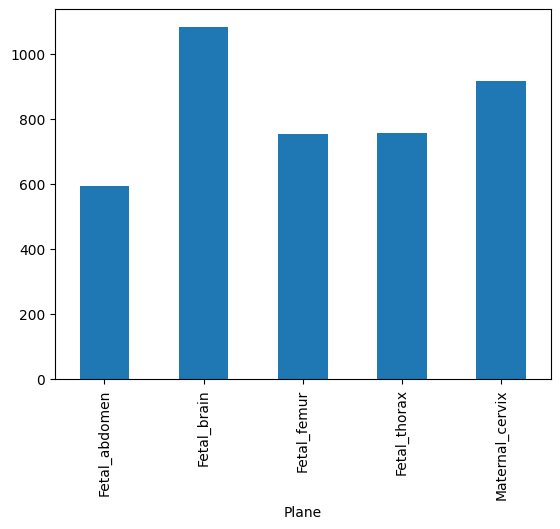

In [3]:
# drop ''other' plane
print('total number of planes having others:',len(spanish_df[spanish_df['Plane']=='Other']))

spanish_df=spanish_df[spanish_df['Plane']!='Other']

spanish_df.groupby('Plane')['Patient_num'].nunique().plot(kind='bar')

In [4]:
total_number_images=spanish_df['Image_name'].nunique()

print('Total number of Images',total_number_images)

print('Total Images per plane:')
print(spanish_df.groupby('Plane')['Patient_num'].count()/total_number_images)

total_patients=spanish_df['Patient_num'].nunique()

print('*****'*50)
print('total number of patients',total_patients)


print('\nTotal unique patients per plane:')
print(spanish_df.groupby('Plane')['Patient_num'].nunique()/total_patients)



Total number of Images 8187
Total Images per plane:
Plane
Fetal_abdomen      0.086845
Fetal_brain        0.377672
Fetal_femur        0.127031
Fetal_thorax       0.209845
Maternal_cervix    0.198608
Name: Patient_num, dtype: float64
**********************************************************************************************************************************************************************************************************************************************************
total number of patients 1747

Total unique patients per plane:
Plane
Fetal_abdomen      0.340584
Fetal_brain        0.619347
Fetal_femur        0.431597
Fetal_thorax       0.432169
Maternal_cervix    0.524900
Name: Patient_num, dtype: float64


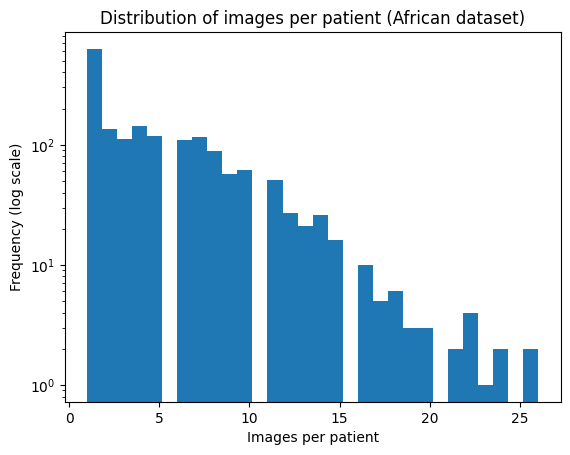

In [5]:
patients = spanish_df['Patient_num'].unique()
# np.random.shuffle(patients) 

counts =spanish_df['Patient_num'].value_counts()
import matplotlib.pyplot as plt
plt.figure()
plt.hist(counts, bins=30, log=True)
plt.xlabel("Images per patient")
plt.ylabel("Frequency (log scale)")
plt.title("Distribution of images per patient (African dataset)")
plt.show()

In [6]:
import torch
patient_ids = spanish_df['Patient_num'].unique()

rng = np.random.default_rng(seed=42)  # reproducibility
shuffled_patients = rng.permutation(patient_ids)
shuffled_patients[:100]


# len

array([ 178, 1195, 1625, 1703, 1472,  348,  736, 1477, 1408, 1140,  515,
       1479,  381,  190, 1489,  674, 1738,  891, 1204, 1721,  701, 1147,
        650,  187, 1435,  863,  350,  819,  600,  359,  915,  729, 1698,
        382, 1734, 1013, 1375,  124,   91, 1122,  342,  942,  396, 1088,
        699,  761, 1673,  764,  964,  264,   92,  591, 1292,  998,  252,
        956, 1173, 1708, 1246, 1717, 1326,  276, 1508,  616, 1622,  735,
       1689, 1305,  219, 1183, 1096, 1184, 1515,  424, 1061, 1697,  228,
        147,  921, 1518, 1071,  507, 1362,  985,  423,  925, 1045, 1247,
        253,  126, 1381,  829,  511, 1269,  720,  912,  536, 1527, 1546,
        318])

# African Dataset

In [59]:
# <!-- african_dataset=Path('/content/drive/MyDrive/Maternal_fetal_dataset_kokil/DEC_2025_PAPER WORK/african_dataset/Zenodo_dataset/African_planes_database.csv') -->

african_df=pd.read_csv(extracted_raw_dir/'african'/'Zenodo_dataset'/'African_planes_database.csv')

african_countries=list(african_df['Center'].unique())

# insert _ inside the plane colum
african_df['Plane']=african_df['Plane'].apply(lambda x: x.replace(' ', '_'))


african_df = african_df.rename(columns={'Filename': 'Image_name'})
african_df = african_df[['Image_name', 'Patient_num', 'Plane']]

african_planes=african_df['Plane'].value_counts().reset_index()

african_df


,Image_name,Patient_num,Plane
0,patient001_DZA_plane0,1,Fetal_abdomen
1,patient001_DZA_plane2,1,Fetal_femur
2,patient001_DZA_plane1,1,Fetal_brain
3,patient001_DZA_plane3,1,Fetal_thorax
4,patient004_DZA_plane1,4,Fetal_brain
...,...,...,...
445,patient053_GHA_plane0,53,Fetal_abdomen
446,patient053_GHA_plane1,53,Fetal_brain
447,patient055_GHA_plane0,55,Fetal_abdomen
448,patient055_GHA_plane2,55,Fetal_femur


In [8]:
total_number_images=african_df['Image_name'].nunique()

print('Total number of Images',total_number_images)

print('Total Images per plane:')
print(african_df.groupby('Plane')['Patient_num'].count()/total_number_images)

total_patients=african_df['Patient_num'].nunique()

print('*****'*50)
print('total number of patients',total_patients)


print('\nTotal unique patients per plane:')
print(african_df.groupby('Plane')['Patient_num'].nunique()/total_patients)



Total number of Images 450
Total Images per plane:
Plane
Fetal_abdomen    0.277778
Fetal_brain      0.277778
Fetal_femur      0.277778
Fetal_thorax     0.166667
Name: Patient_num, dtype: float64
**********************************************************************************************************************************************************************************************************************************************************
total number of patients 64

Total unique patients per plane:
Plane
Fetal_abdomen    1.000000
Fetal_brain      1.000000
Fetal_femur      1.000000
Fetal_thorax     0.671875
Name: Patient_num, dtype: float64


In [9]:
african_counts = african_df['Patient_num'].value_counts().values
spanish_counts = spanish_df['Patient_num'].value_counts().values

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=[
    "Distribution of images per patient (African dataset)",
    "Distribution of images per patient (Spanish dataset)"
])

# Add histograms
fig.add_trace(
    go.Histogram(x=african_counts, nbinsx=30, name="African dataset"),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=spanish_counts, nbinsx=30, name="Spanish dataset"),
    row=1, col=2
)

# Update layout
fig.update_layout(
    height=600,
    width=1000,
    # title_text="Side-by-side Distribution of Images per Patient",
    showlegend=False,
    xaxis1=dict(title="Number of images per patient"),
    yaxis1=dict(title="Count of patients"),
    xaxis2=dict(title="Number of images per patient"),
    yaxis2=dict(title="Count of patients")
)

fig.show()

# to save fig
current_dir=Path.cwd()

fig.write_image(current_dir.parent/'reports'/"patient_distribution.png", width=1200, height=700, scale=2) 



/tmp/ipykernel_33580/1510253185.py:38: DeprecationWarning:


Support for Kaleido versions less than 1.0.0 is deprecated and will be removed after September 2025.
Please upgrade Kaleido to version 1.0.0 or greater (`pip install 'kaleido>=1.0.0'` or `pip install 'plotly[kaleido]'`).




# install chromium browser
sudo apt-get update
sudo apt-get install -y chromium-browser

pip install kaleido==0.2.1

In [10]:
import numpy as np

def split_dataset(
    df,
    split_level='patient',          # 'patient' or 'plane'
    patient_col='Patient_num',
    plane_col='Plane',
    train_ratio=0.70,
    val_ratio=0.15,
    seed=42
):
    """
    Split dataset either by patient or by plane using permutation.
    """

    np.random.seed(seed)

    # -------------------------
    # Split by PATIENT
    # -------------------------
    if split_level == 'patient':
        ids = df[patient_col].unique()

        permuted_ids = np.random.permutation(ids)
        n = len(permuted_ids)

        train_ids = permuted_ids[:int(n * train_ratio)]
        val_ids = permuted_ids[int(n * train_ratio):int(n * (train_ratio + val_ratio))]
        test_ids = permuted_ids[int(n * (train_ratio + val_ratio)):]

        train_df = df[df[patient_col].isin(train_ids)]
        val_df   = df[df[patient_col].isin(val_ids)]
        test_df  = df[df[patient_col].isin(test_ids)]

    # -------------------------
    # Split by PLANE
    # -------------------------
    elif split_level == 'plane':
        planes = df[plane_col].unique()

        permuted_planes = np.random.permutation(planes)
        n = len(permuted_planes)

        train_planes = permuted_planes[:int(n * train_ratio)]
        val_planes   = permuted_planes[int(n * train_ratio):int(n * (train_ratio + val_ratio))]
        test_planes  = permuted_planes[int(n * (train_ratio + val_ratio)):]

        train_df = df[df[plane_col].isin(train_planes)]
        val_df   = df[df[plane_col].isin(val_planes)]
        test_df  = df[df[plane_col].isin(test_planes)]

    else:
        raise ValueError("split_level must be 'patient' or 'plane'")

    return train_df, val_df, test_df


In [11]:
from typing import List


spanish_train_df, spanish_val_df, spanish_test_df = split_dataset(spanish_df)  # split by patient
spanish_train_df_plane, spanish_val_df_plane, spanish_test_df_plane = split_dataset(spanish_df, split_level = 'plane')  # split by plane


african_train_df, african_val_df, african_test_df = split_dataset(african_df)   # split by patient
african_train_df_plane, african_val_df_plane, african_test_df_plane = split_dataset(african_df, split_level = 'plane') #  split by plane


# merge two dataframes
def merge_df(
    df1: pd.DataFrame,
    df2: pd.DataFrame,
    dataset_name: List[str]=["Spanish", "African"]
) -> pd.DataFrame:
    """
    Merge two datasets and add dataset identifier column.
    """
    assert len(dataset_name)==2, 'dataset_name must have exactly two entries'
    assert set(df1.columns)==set(df1.columns), 'both dataframes must have same columns'
    return pd.concat(
        [
            df1.assign(dataset=dataset_name[0]),
            df2.assign(dataset=dataset_name[1])
        ],
        ignore_index=True
    )

mixed_df_patient_split={
    'train':merge_df(df1=spanish_train_df,df2=african_train_df),
    'val':merge_df(df1=spanish_val_df,df2=african_val_df),
    'test':merge_df(df1=spanish_test_df,df2=african_test_df)
}

mixed_df_plane_split={
    'train':merge_df(df1=spanish_train_df_plane,df2=african_train_df_plane),
    'val':merge_df(df1=spanish_val_df_plane,df2=african_val_df_plane),
    'test':merge_df(df1=spanish_test_df_plane,df2=african_test_df_plane)
}



In [12]:
def plot_split_comparison(
    dfs:List[pd.DataFrame],
    
    title_list: List[str] = ['Patient-based Split (Mixed)', 'Random Image Split (Mixed)']
        ) :
    
    fig = make_subplots(
        rows=1,
        cols=len(dfs),
        specs=[[{'type': 'domain'}] * len(dfs)],
        subplot_titles=title_list
    )
    plane_counts = {}
    for i,df in enumerate(dfs,start=1):
        counts=(
            df["Plane"]
            .value_counts()
            .reset_index()
           
        )
        plane_counts[f"{i}"]=counts
        
        fig.add_trace(
            go.Pie(
                labels=counts['Plane'],
                values=counts['count'],
                textinfo='percent+label',
                hole=0.4,
                textposition='inside',
            ),
            row=1,
            col=i
        )

    fig.update_layout(
        height=400,
        width=350 * len(dfs),
        # title_text=main_title,
        showlegend=True
    )

    fig.show()
    fig.write_image(current_dir.parent/'reports'/"Plane_Distribution_Comparison.png", width=1200, height=700, scale=2)
    
    return plane_counts
            
plot_split_comparison(dfs=[mixed_df_patient_split['train'],mixed_df_plane_split['train']])['1']

/tmp/ipykernel_33580/3116370653.py:43: DeprecationWarning:


Support for Kaleido versions less than 1.0.0 is deprecated and will be removed after September 2025.
Please upgrade Kaleido to version 1.0.0 or greater (`pip install 'kaleido>=1.0.0'` or `pip install 'plotly[kaleido]'`).




,Plane,count
0,Fetal_brain,2216
1,Fetal_thorax,1242
2,Maternal_cervix,1086
3,Fetal_femur,792
4,Fetal_abdomen,567


# Organize images into mixed dataset folder with subfolders[train,val,test]

In [68]:
def build_plane_dict(df):
    return (
        df.groupby('Plane')['Image_name']
          .apply(list)
          .to_dict()
    )

splits=['train','val','test']

# image source path
current_dir=Path.cwd()
src_path_spanish=Path(current_dir.parent/'data'/'extracted'/'spanish'/'Images')
src_path_african=Path(current_dir.parent/'data'/'extracted'/'african'/'Zenodo_dataset')

# image desitantion path
dst_path_mixed=Path(current_dir.parent/'data'/'mixed_images')

mixed_image_dataset_info={}
for split in splits:
    print(f'{split}_dataset')
    df_split=mixed_df_patient_split[split]
    spanish_df_split = df_split[df_split['dataset'] == "Spanish"]
    african_df_split = df_split[df_split['dataset'] == "African"]

    # plane_dict
    spanish_plane_dict=build_plane_dict(spanish_df_split)
    african_plane_dict=build_plane_dict(african_df_split)
    mixed_image_dataset_info[split]={}
    for plane_sp, images_sp_list in spanish_plane_dict.items():

        print(split, "Spanish:", plane_sp, len(images_sp_list))
        mixed_image_dataset_info[split][plane_sp]={}
        mixed_image_dataset_info[split][plane_sp]['Spanish']=len(images_sp_list)

        plane_dest_sp = dst_path_mixed / split / plane_sp
        plane_dest_sp.mkdir(parents=True, exist_ok=True)

        for img_sp_name in images_sp_list:

            src_image_sp = src_path_spanish / f"{img_sp_name}.png"
            dst_img_sp = plane_dest_sp / f"{img_sp_name}.png"

            if src_image_sp.exists():
                shutil.copy2(src_image_sp, dst_img_sp)
            else:
                print(f"⚠️ Missing Spanish: {img_sp_name}.png")
        

    # african_countries=list(african_df['Center'].unique())

    for plane_af, images_af_list in african_plane_dict.items():

        print(split, "African:", plane_af, len(images_af_list))
        if plane_af not in mixed_image_dataset_info[split]:
            mixed_image_dataset_info[split][plane_af] = {}
        
        mixed_image_dataset_info[split][plane_af]['African']=len(images_af_list)
        
        plane_dest_af = dst_path_mixed / split / plane_af
        plane_dest_af.mkdir(parents=True, exist_ok=True)

        for img_af_name in images_af_list:

            # found = False

            for country in african_countries:
                src_image_af = src_path_african / country / f"{img_af_name}.png"

                if src_image_af.exists():
                    shutil.copy2(src_image_af, plane_dest_af / f"{img_af_name}.png")
                    found = True
                    break

            if not found:
                print(f"⚠️ Missing African: {img_af_name}.png")
    
   
    


train_dataset
train Spanish: Fetal_abdomen 480
train Spanish: Fetal_brain 2129
train Spanish: Fetal_femur 706
train Spanish: Fetal_thorax 1190
train Spanish: Maternal_cervix 1086
train African: Fetal_abdomen 87
train African: Fetal_brain 87
train African: Fetal_femur 86
train African: Fetal_thorax 52
val_dataset
val Spanish: Fetal_abdomen 106
val Spanish: Fetal_brain 477
val Spanish: Fetal_femur 172
val Spanish: Fetal_thorax 265
val Spanish: Maternal_cervix 225
val African: Fetal_abdomen 21
val African: Fetal_brain 21
val African: Fetal_femur 22
val African: Fetal_thorax 13
test_dataset
test Spanish: Fetal_abdomen 125
test Spanish: Fetal_brain 486
test Spanish: Fetal_femur 162
test Spanish: Fetal_thorax 263
test Spanish: Maternal_cervix 315
test African: Fetal_abdomen 17
test African: Fetal_brain 17
test African: Fetal_femur 17
test African: Fetal_thorax 10


In [90]:
mixed_image_dataset_info['train']

fig = make_subplots(
    rows=1,
    cols=len(splits),
    subplot_titles=splits
)

colors = ["#1f77b4", "#ff7f0e"]
for i, split in enumerate(splits, start=1):

    split_info = mixed_image_dataset_info[split]

    planes = list(split_info.keys())
    sp_counts = [split_info[p].get('Spanish', 0) for p in planes]
    af_counts = [split_info[p].get('African', 0) for p in planes]

    # Spanish bars
    fig.add_trace(
        go.Bar(
            x=planes,
            y=sp_counts,
            name="Spanish",
            marker_color=colors[0],
            text=sp_counts,
            textposition="outside"
        ),
        row=1, col=i
    )

    # African bars
    fig.add_trace(
        go.Bar(
            x=planes,
            y=af_counts,
            name="African",
            marker_color=colors[1],
            text=af_counts,
            textposition="outside"
        ),
        row=1, col=i
    )

fig.update_layout(
    height=500,
    width=350 * len(splits),
    barmode='group',
    showlegend=True,
    title_text="Plane-wise Image Count: Spanish vs African"
)

fig.show()


In [83]:
planes=mixed_image_dataset_info['train'].keys()
[mixed_image_dataset_info['train'][plane]['Spanish'] for plane in planes]
[mixed_image_dataset_info['train'][p].get('African', 0) for p in planes]

[87, 87, 86, 52, 0]